# <font color = 'orange'> EDA With Algerian Forest Fires Dataset 

## 1. UNDERSTANDING THE GIVEN TASK
Task given by Krish Naik
1. Import the dataset.
https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report**

**3. Exploratory Data Analysis (EDA) on all Features**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, Bejaia and Sidi-Bel Abbes

---

### <font color = 'blue'> Importing library and loading dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


---

### <font color = 'blue'> Checking the dataframe information and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### <font color = '#AA00FF'> Observation :
* Looks like all the features are identified as object but they are numeric except the output column we can convert into numeric by removing strings present in the rows.

---

## Data cleaning

### <font color = 'blue'>  Check which columns has null values

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### <font color = '#AA00FF'> Observation :
* The dataset is converted into 2 sets based on the region from 122th index, we can make new column based on the region  
    
    
**1 : Bejaia Region Dataset**  
    
**2 : Sidi-Bel Abbes Region Dataset** 

### <font color = 'blue'>  Adding new column with region

In [5]:
df.loc[:122,'Region'] = 1
df.loc[122:,'Region'] = 2

# converting into integer data type
df[['Region']] = df[['Region']].astype(int)

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


---

### <font color = 'blue'> we will remove null or nan values if they are present 

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

### <font color = '#AA00FF'> Observation :
* Few null values are present we have to remove them.

In [7]:
df = df.dropna().reset_index(drop = True)

In [8]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### <font color = 'blue'> We will find the column which has string and we will remove it so that later we can convert feature into respective data types.

In [9]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [10]:
df = df.drop(122).reset_index(drop=True)

In [11]:
df.shape

(243, 15)

---

### <font color = 'blue'> Let's check columns present

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### <font color = '#AA00FF'> Observation :
* Some columns name have unwanted space so we have to fix them.

In [13]:
df.columns = df.columns.str.strip()

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

---

### <font color = 'blue'> Changing columns into corresponding data types

In [14]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


### <font color = 'blue'> Changing the required columns to integer data type

In [16]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

### <font color = 'blue'> Changing the required columns to float data type

In [17]:
for feature in df.columns:
    if (df[feature].dtype == object) and (feature != 'Classes'):
        df[feature] = df[feature].astype(float)

In [18]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


### <font color = '#AA00FF'> Observation :
* All columns data type are fixed.

---

### <font color = 'blue'> Checking statistics of the features

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


---

### <font color = 'blue'> Data cleaning in target variables

In [21]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

### <font color = '#AA00FF'> Observation :
* Looks like there are some extra spaces present in the feature so we have to remove it.

In [22]:
df['Classes'] = df['Classes'].str.strip()

In [23]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

---

### <font color = 'blue'> Region 1 (Bejaia Region)

In [24]:
df[df['Region']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


### <font color = 'blue'> Region 2 (Sidi-Bel Abbes Region)

In [25]:
df[df['Region']==2]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


### <font color = 'blue'> Now, We will store the cleaned data in another excel file

In [26]:
df.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

---

## Exploratory Data Analysis(EDA)

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


### <font color = 'blue'> Droping year features

In [28]:
df1 = df.drop(['day','month','year'],axis=1)

### <font color = 'blue'> Data Encoding for Class Feature

In [29]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [30]:
df1['Classes'] = np.where(df1['Classes'] == 'not fire',0,1)

In [31]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

###  Visualization of distribution

### <font color = 'blue'> Plot density plot for all features

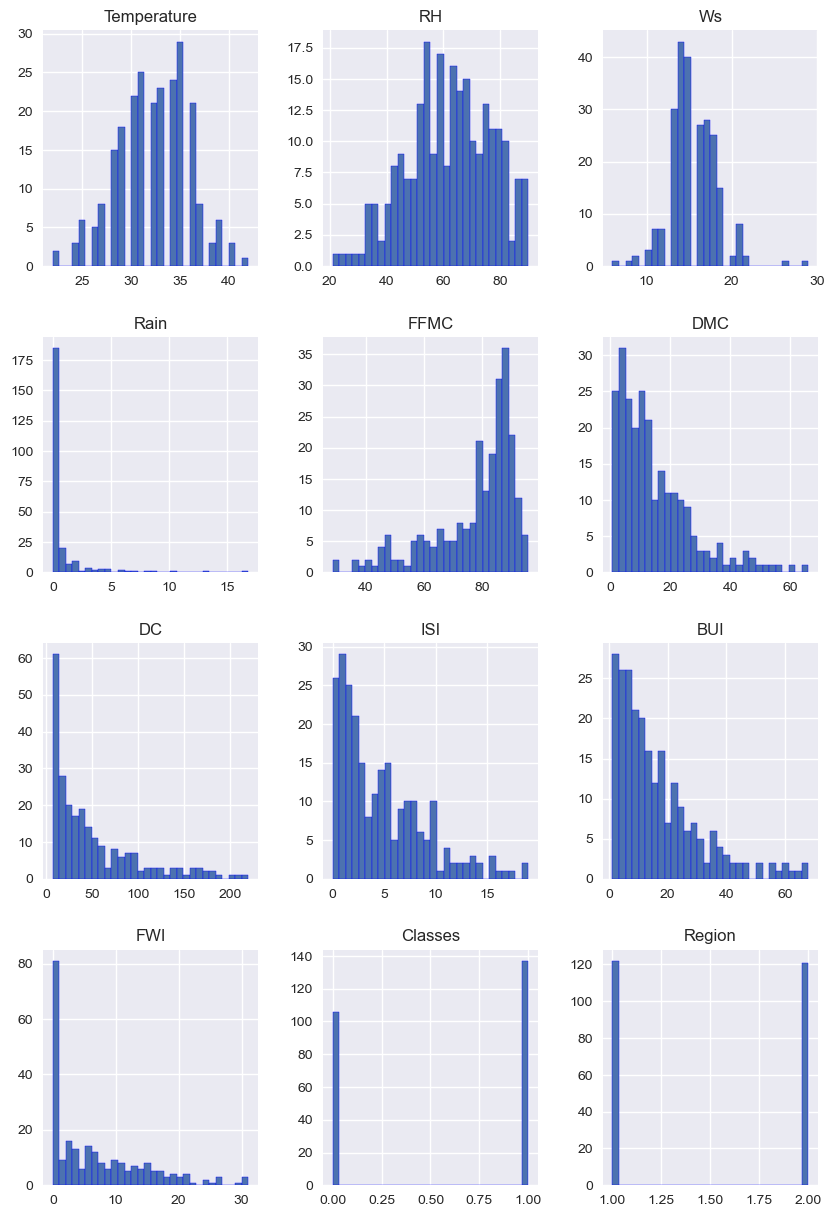

In [32]:
plt.style.use('seaborn')
df1.hist(bins=30 , figsize = (10,15) , ec = 'b')
plt.show()

### <font color = 'blue'> Pie Chart for the output feature

In [33]:
# Calculating the percentage for the pie chart 

percentage = df1['Classes'].value_counts(normalize = True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

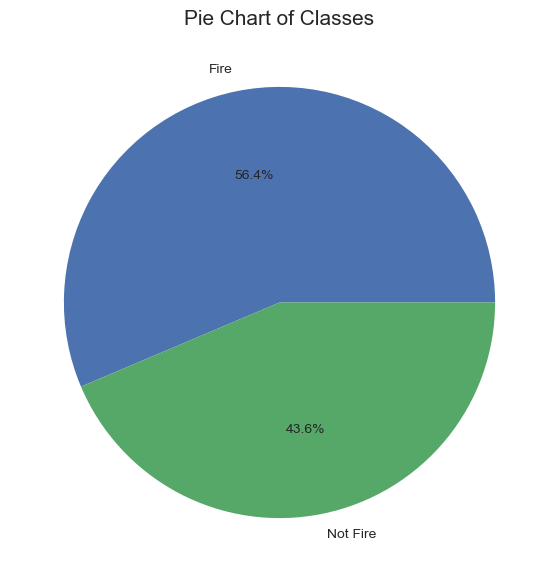

In [34]:
# plotting pie chart

class_label = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels = class_label,autopct='%1.1f%%')
plt.title('Pie Chart of Classes',fontsize=15)
plt.show()

### <font color = '#AA00FF'> Observation :
* Dataset is not balanced as we can see that not fire has less percent.

### <font color = 'blue'> Checking correlation between the feature

<AxesSubplot:>

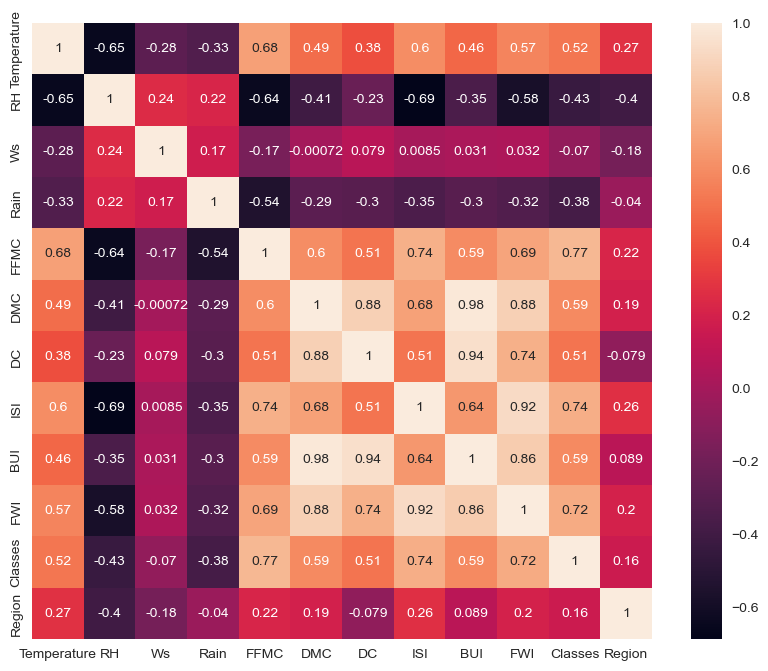

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

### <font color = 'blue'> Monthwise fire analysis for both the group

In [36]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [37]:
import calendar

df['month'] = df['month'].apply(lambda x : calendar.month_abbr[x])

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,Jun,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,Jun,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,Jun,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,Jun,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,Jun,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,Sep,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,Sep,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,Sep,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,Sep,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


<AxesSubplot:xlabel='month', ylabel='count'>

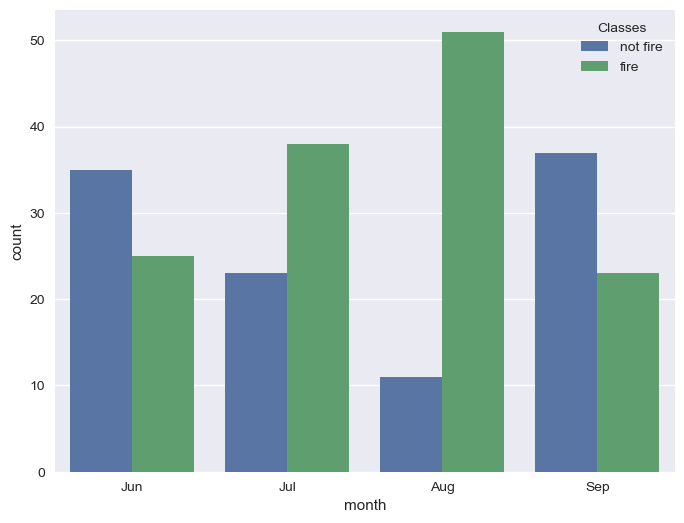

In [38]:
plt.figure(figsize=(8,6))

sns.countplot(data = df,x = 'month',hue = 'Classes')

### <font color = '#AA00FF'> Observation :
* In general is less chance forest fire in june and september months when compared to other months.
* In general is high chance of forest fire in July and August.

<AxesSubplot:xlabel='month', ylabel='count'>

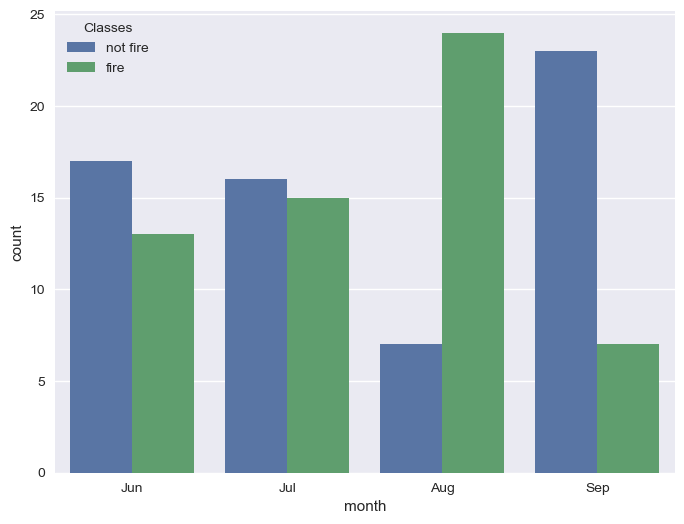

In [39]:
plt.figure(figsize=(8,6))

# count plot for Bejaia Region
sns.countplot(data = df[df['Region'] == 1],x = 'month',hue = 'Classes')

<AxesSubplot:xlabel='month', ylabel='count'>

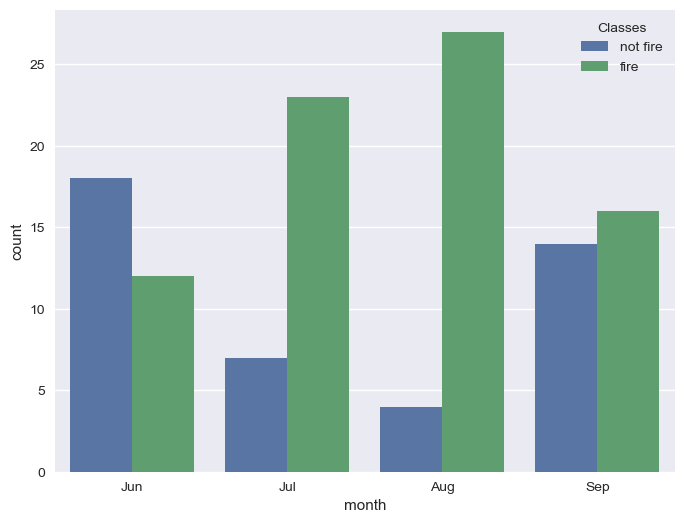

In [40]:
plt.figure(figsize=(8,6))

# count plot for Sidi-Bel Abbes Region
sns.countplot(data = df[df['Region'] == 2],x = 'month',hue = 'Classes')

### <font color = '#AA00FF'> Observation :
* In the month of August chance of forest fire is high region don't matter.
* There is very less chance of getting forest fire in Bejaia Region during September month and also in Sidi-Bel Abbes region during June.
* There is high chance of forest fire in Sidi-Bel Abbes Region during July month. 

### <font color = 'blue'> EDA on all features

In [41]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [42]:
def barchart(feature,xlabel):
    plt.figure(figsize=(14,8))
    byfeature = df1.groupby([feature],as_index = False)['Classes'].sum()
    ax = sns.barplot(x = feature,y = 'Classes',data = byfeature[[feature,'Classes']],estimator=sum)
    ax.set(xlabel = xlabel , ylabel = 'Fire Count')

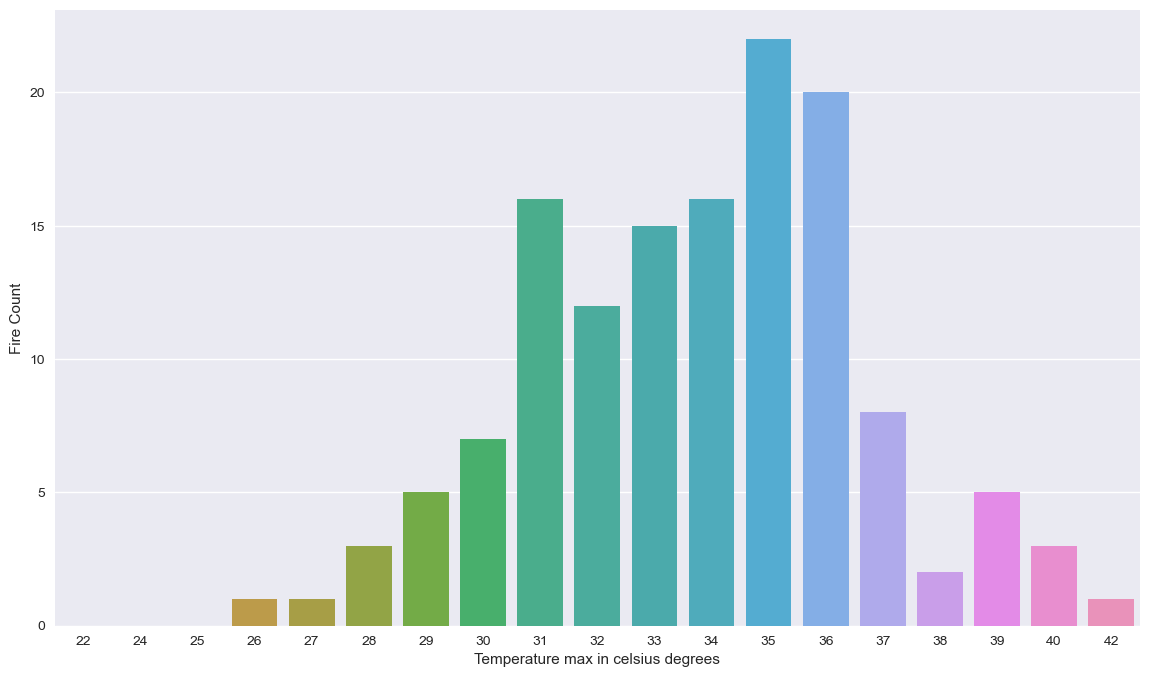

In [43]:
barchart('Temperature','Temperature max in celsius degrees')

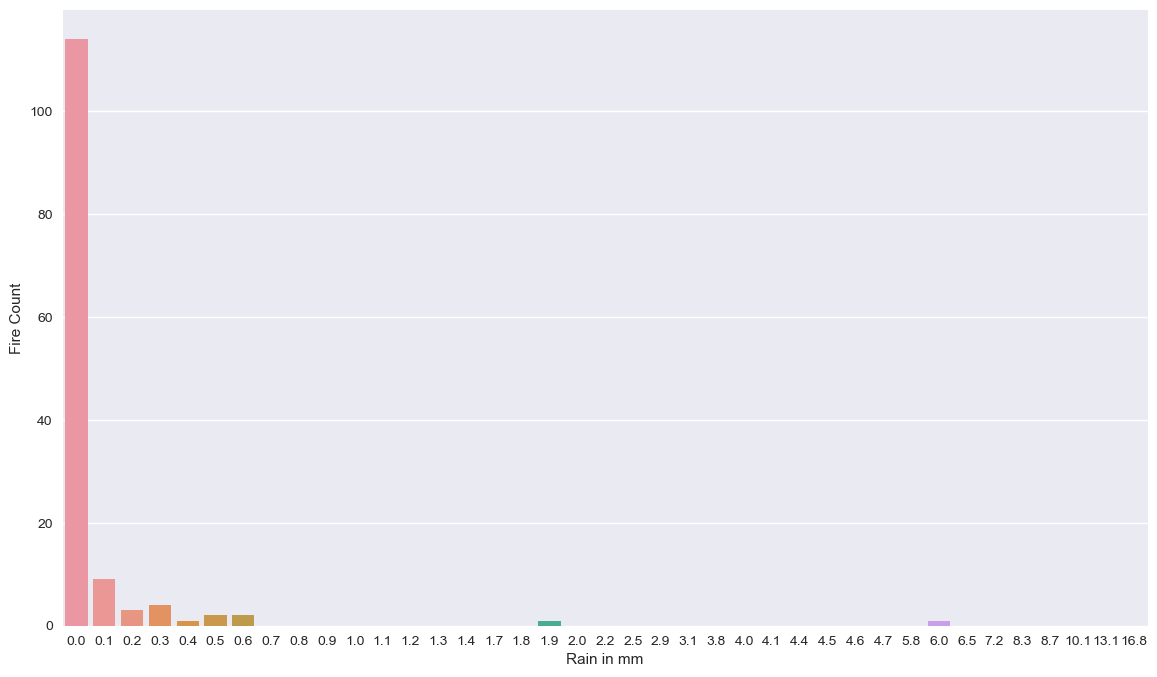

In [44]:
barchart('Rain','Rain in mm')

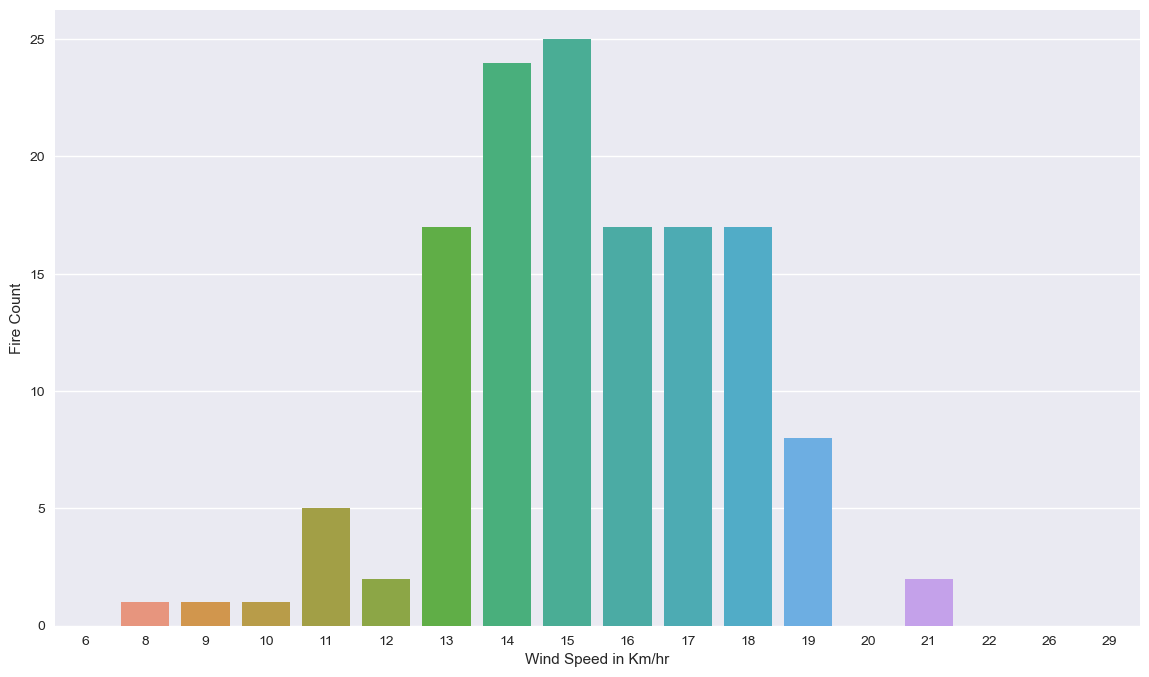

In [45]:
barchart('Ws','Wind Speed in Km/hr')

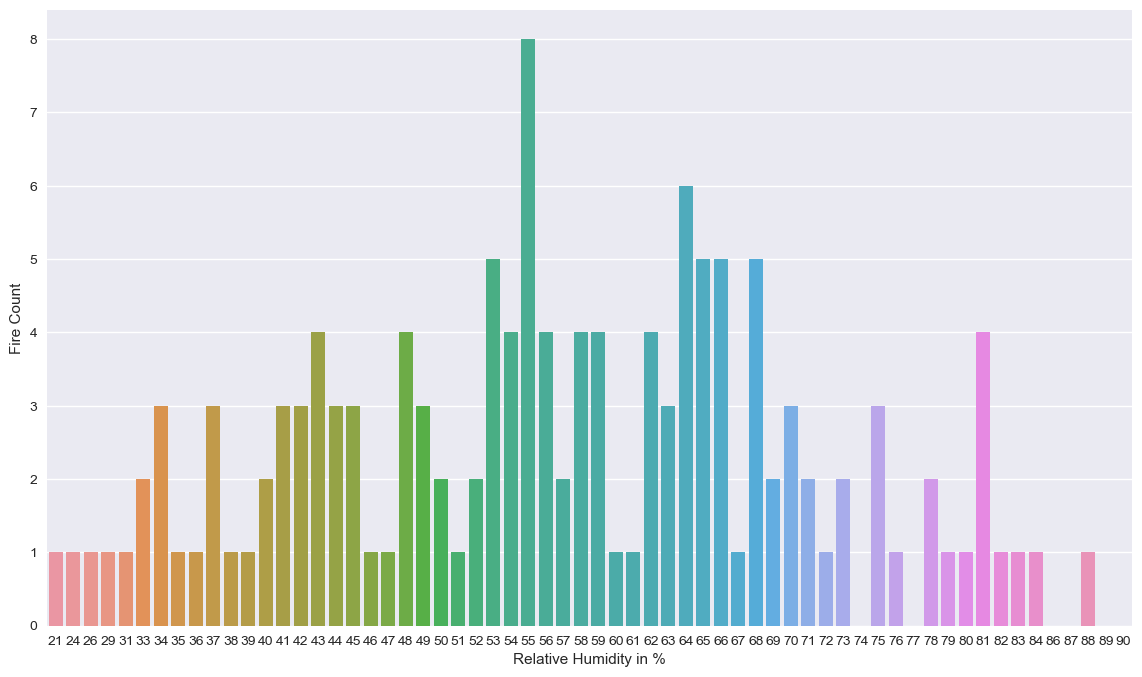

In [46]:
barchart('RH','Relative Humidity in %')

<AxesSubplot:>

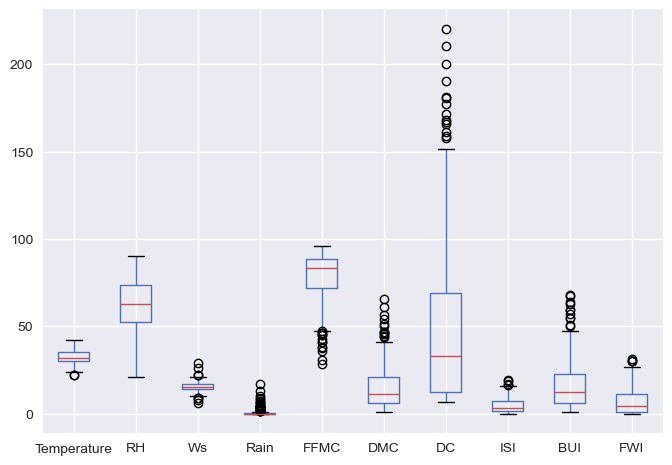

In [47]:
df2 = df1.drop(['Classes','Region'],axis=1)
df2.boxplot()

### <font color = 'blue'> Consturing histogram for all the features

In [48]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

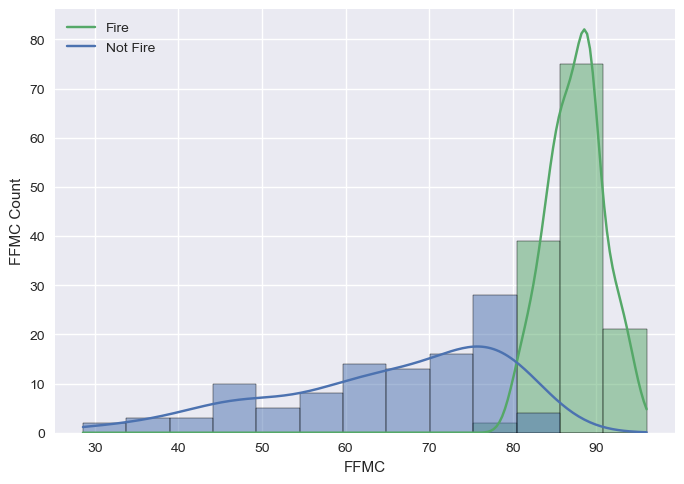

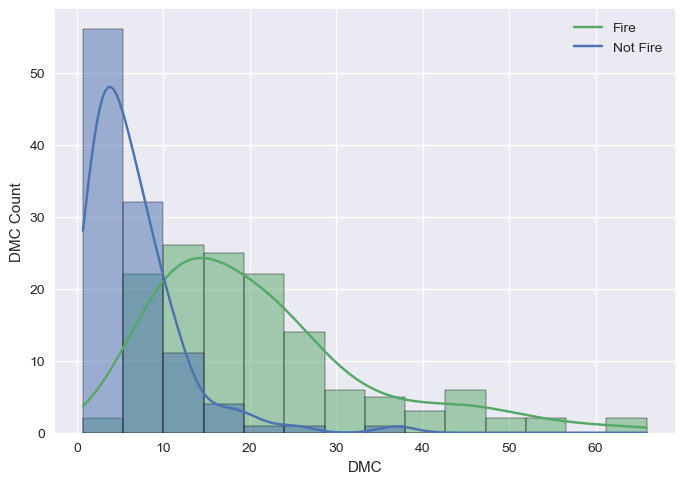

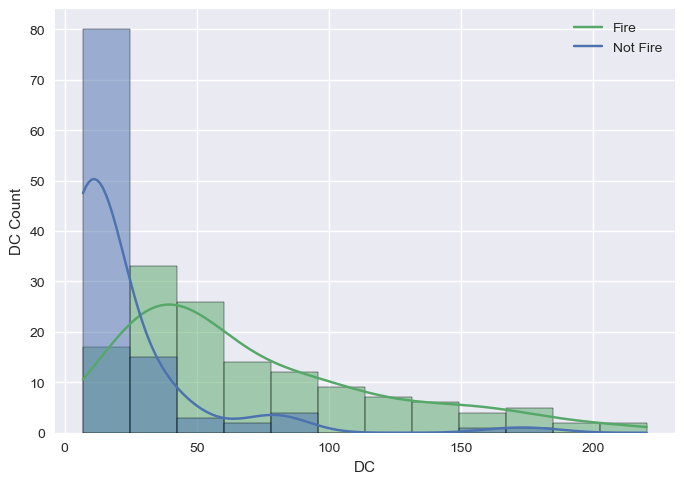

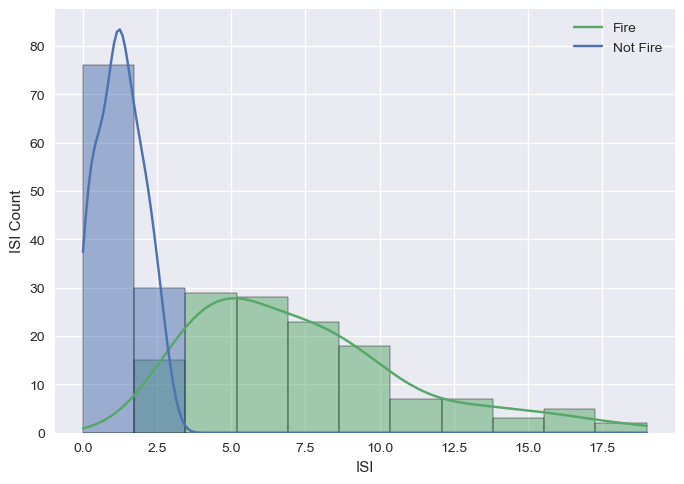

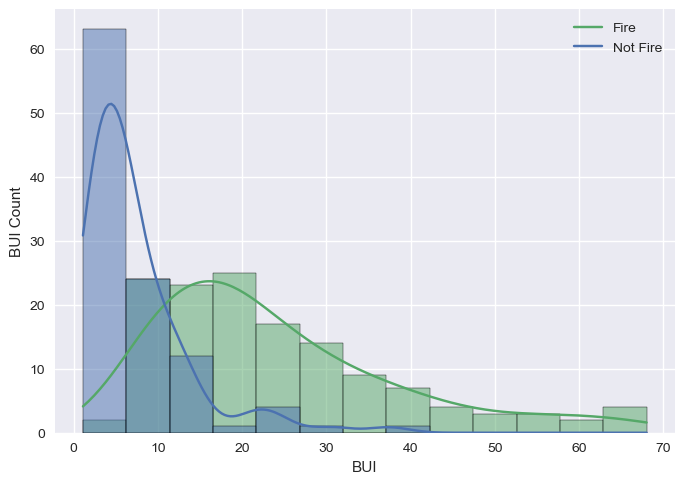

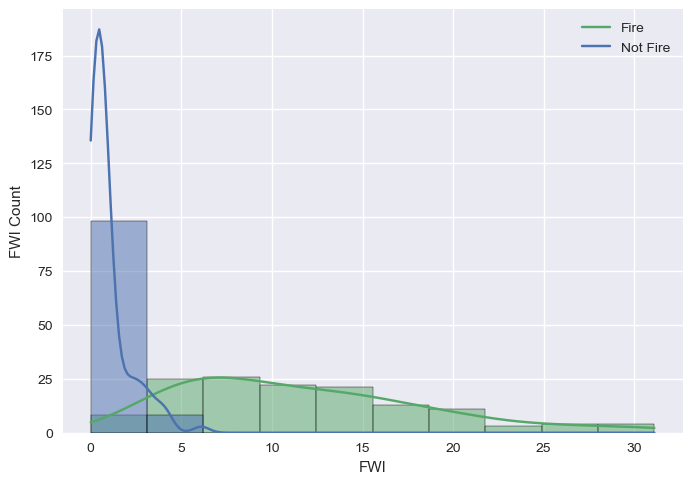

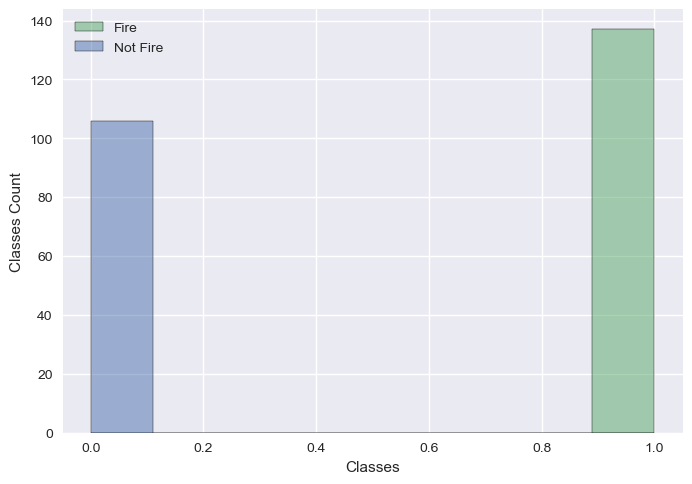

In [50]:
dftemp = df1[['FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI','Classes']]

for feature in dftemp:
    sns.histplot(data = dftemp , x = feature , kde = True , hue = 'Classes')
    plt.legend(labels = ['Fire','Not Fire'])
    plt.xlabel(feature)
    plt.ylabel(f'{feature} Count')
    plt.show()

In [51]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


### <font color = '#AA00FF'> Observation :
* **Temperature** : **Highest forest fire** happens between **31 to 36 degree celsius**.
* **Rain** : **Highest forest fire** happens between **0.0 to 0.3mm**.
* **Wind Speed** : **Highest forest fire** happens between **13 to 18km/hr**.
* **Relative humidity** : **Highest forest fire** happens between **50  to 70%**.  
      
    
* **FFMC**(Fine Fuel Moisture Code) index : **Highest forest fire** happens in index between **80 to 90**.
    
* **DMC**(Duff Moisture Code) index : **High chance** of forest fire in  between **0 to 10DMC** and **low chance** of forest fire happens in  between **10 to 30DMC** we have more evidence.
    
* **DC**(Drought Code) index : **High chance of forest fire** is in between **above 25DC**.
    
* **ISI**(Initial Spread Index) index : **High chance of forest fire** happens in index between **above 3ISI**.
    
* **BUI**(Builup Index) index : **High chance of forest fire** happens **above 10BUI**.
    
* **FWI**(Fire Weather Index) index : **High chance of forest fire** happens in between **3 to 25 FWI**.

---